In [5]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [12]:
dataset1 = pd.read_csv('C:\\Users\\ademo\\Dropbox\\Archive\\unsup\\historical_table_adjusted_3.csv', sep=',')
x = dataset1.values[:,0:10]
y = dataset1.values[:,10]

In [13]:
dataset_req = dataset1.drop(['release'],axis = 1)
display(dataset1.head())

display(pd.DataFrame(x).head())

display(pd.DataFrame(y).head())



,req_priority,tech_rank,opport,support_type,source_req,proj_type,type_feature,bu,numProd_line,total_effort,release
0,2,5,3,1,4,44,1,4,1,0.0,0
1,2,11,3,1,15,25,1,4,2,9.0,1
2,2,12,0,1,15,38,5,1,2,5.0,0
3,1,23,3,1,15,26,1,4,1,11.0,1
4,1,22,0,1,15,23,5,2,3,3.0,0


,0,1,2,3,4,5,6,7,8,9
0,2.0,5.0,3.0,1.0,4.0,44.0,1.0,4.0,1.0,0.0
1,2.0,11.0,3.0,1.0,15.0,25.0,1.0,4.0,2.0,9.0
2,2.0,12.0,0.0,1.0,15.0,38.0,5.0,1.0,2.0,5.0
3,1.0,23.0,3.0,1.0,15.0,26.0,1.0,4.0,1.0,11.0
4,1.0,22.0,0.0,1.0,15.0,23.0,5.0,2.0,3.0,3.0


,0
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
cleanDataSet = pd.DataFrame(standard.fit_transform(dataset_req))
cleanDataSet.head(15)

,0,1,2,3,4,5,6,7,8,9
0,2.231626,-0.564174,2.011738,-0.359961,-1.276282,0.399099,-1.351828,1.271336,-0.689883,-0.543168
1,2.231626,-0.549555,2.011738,-0.359961,0.806718,-0.558285,-1.351828,1.271336,-0.167670,-0.025623
2,2.231626,-0.547119,-0.497083,-0.359961,0.806718,0.096767,1.395557,-1.412759,-0.167670,-0.255643
3,0.712753,-0.520318,2.011738,-0.359961,0.806718,-0.507896,-1.351828,1.271336,-0.689883,0.089387
4,0.712753,-0.522755,-0.497083,-0.359961,0.806718,-0.659062,1.395557,-0.518061,0.354543,-0.370653
5,0.712753,-0.542246,2.011738,-0.359961,0.806718,0.096767,1.395557,1.271336,0.876757,-0.025623
6,0.712753,-0.551992,2.011738,-0.359961,0.806718,0.096767,1.395557,1.271336,-0.167670,-0.479913
7,0.712753,-0.573919,-0.497083,-0.359961,0.806718,-1.818001,1.395557,1.271336,0.354543,0.951963
8,0.712753,-0.495954,2.011738,-0.359961,0.806718,0.399099,0.021864,-1.412759,0.354543,-0.428158
9,2.231626,-0.564174,-0.497083,-0.359961,0.806718,0.399099,-1.351828,0.376638,0.354543,-0.364903


In [15]:
 from matplotlib.gridspec import GridSpec

som = MiniSom(10, 10, 10, sigma=0.25,neighborhood_function='gaussian') 
som.train_random(cleanDataSet.to_numpy(), 30000) # trains the SOM with 100 iterations

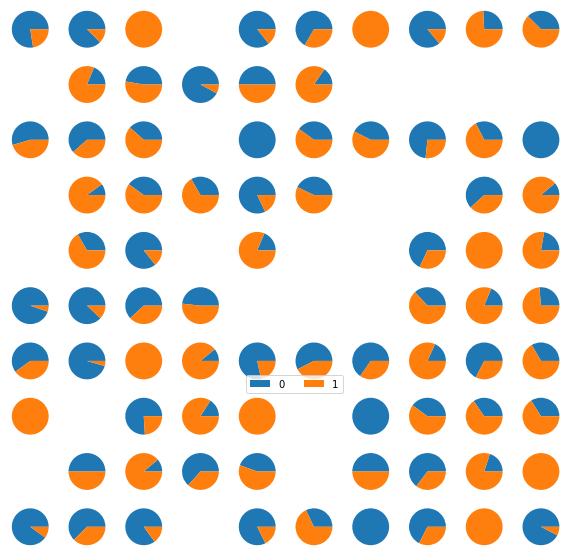

In [16]:
target = dataset1.release.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

plt.figure(figsize=(10, 10))
the_grid = GridSpec(10, 10)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)

plt.show()

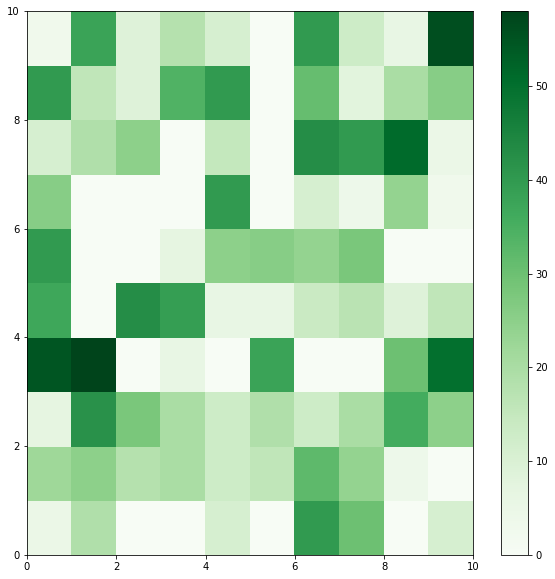

In [18]:
plt.figure(figsize=(10, 10))
frequencies = np.zeros((10, 10))
for position, values in som.win_map(cleanDataSet.to_numpy()).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Greens')
plt.colorbar()
plt.show()

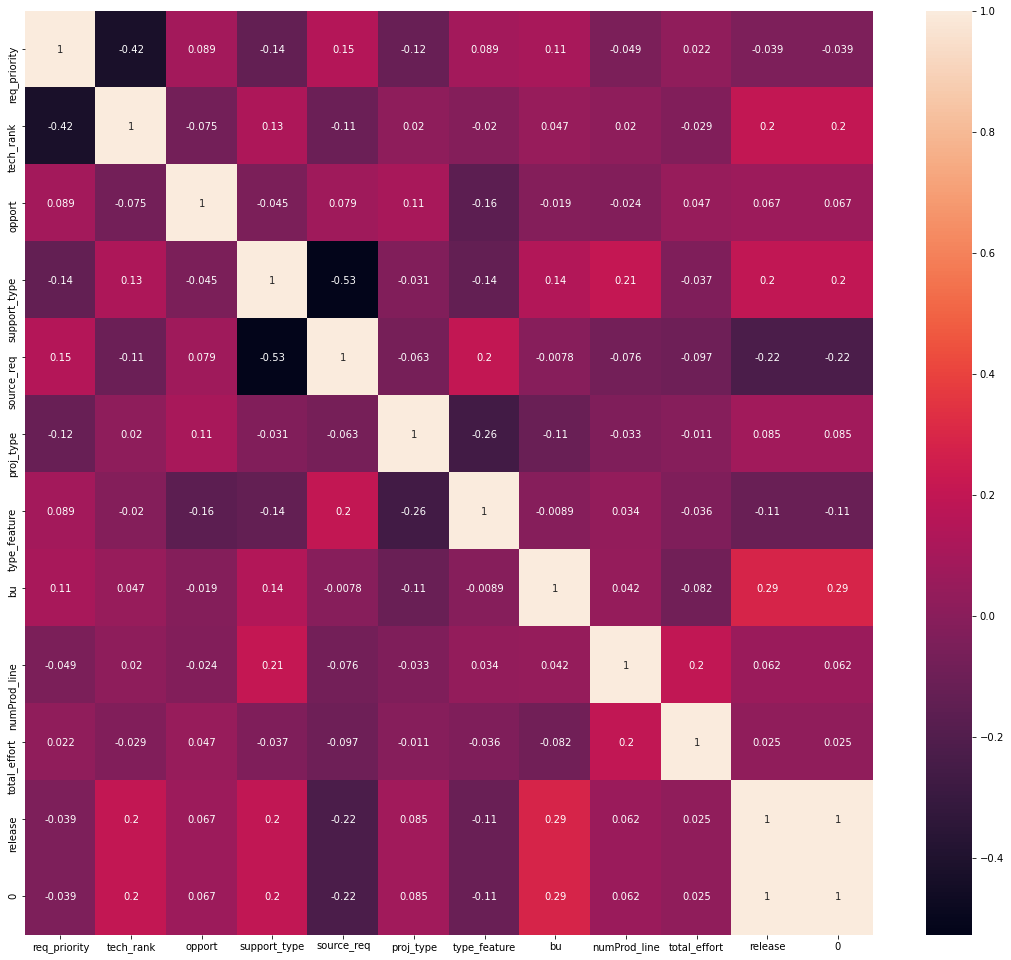

In [31]:
target = dataset1.release.astype('category').cat.codes
data_and_target = pd.concat([dataset1, target], axis=1)
Var_Corr = data_and_target.corr()
plt.figure(figsize=(19, 17))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)


plt.show()

In [45]:
#Initialization
data = np.array(dataset1)
from pylab import plot, axis, show, pcolor, colorbar, bone
from hyperopt import fmin, tpe, hp

In [51]:
def train_som (x, y, input_len, sigma, learning_rate):
    som = MiniSom(x=x,
             y=y,
             input_len=input_len,
             sigma=sigma,
             learning_rate = learning_rate)
    som.random_weights_init(data)

    # training
    start_time = time.time()
    som.train_random(data, interations)
    elapsed_time = time.time() - start_time
    print(elapsed_time, " seconds")
    return som

def plot_som(som):
    plt.figure(figsize=(16 ,12))
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o','s','D']
    colors = ['r','g','b']

    for cnt, xx in enumerate(data):
        w = som.winner(xx)
        plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
        markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)  
        plt.title('Why Use SOMs if you Have labels?')
    axis([0,som._weights.shape[0],0,som._weights.shape[1]])
    show()

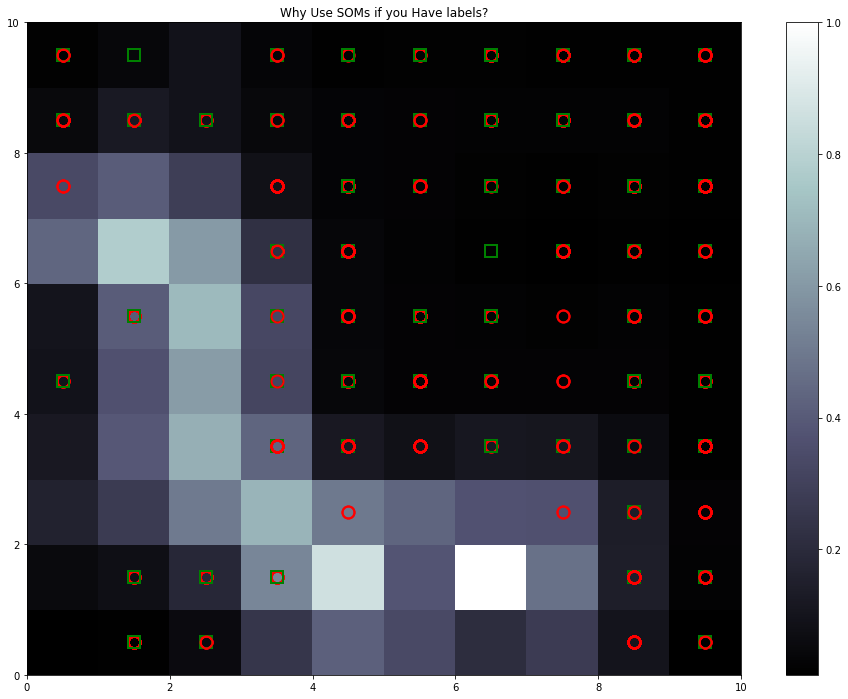

In [52]:
# set hyperparameters
x = 10
y = 10
input_len = dataset1.shape[1]
sigma = 1
learning_rate = 0.5
interations = 1000
plot_som(som)

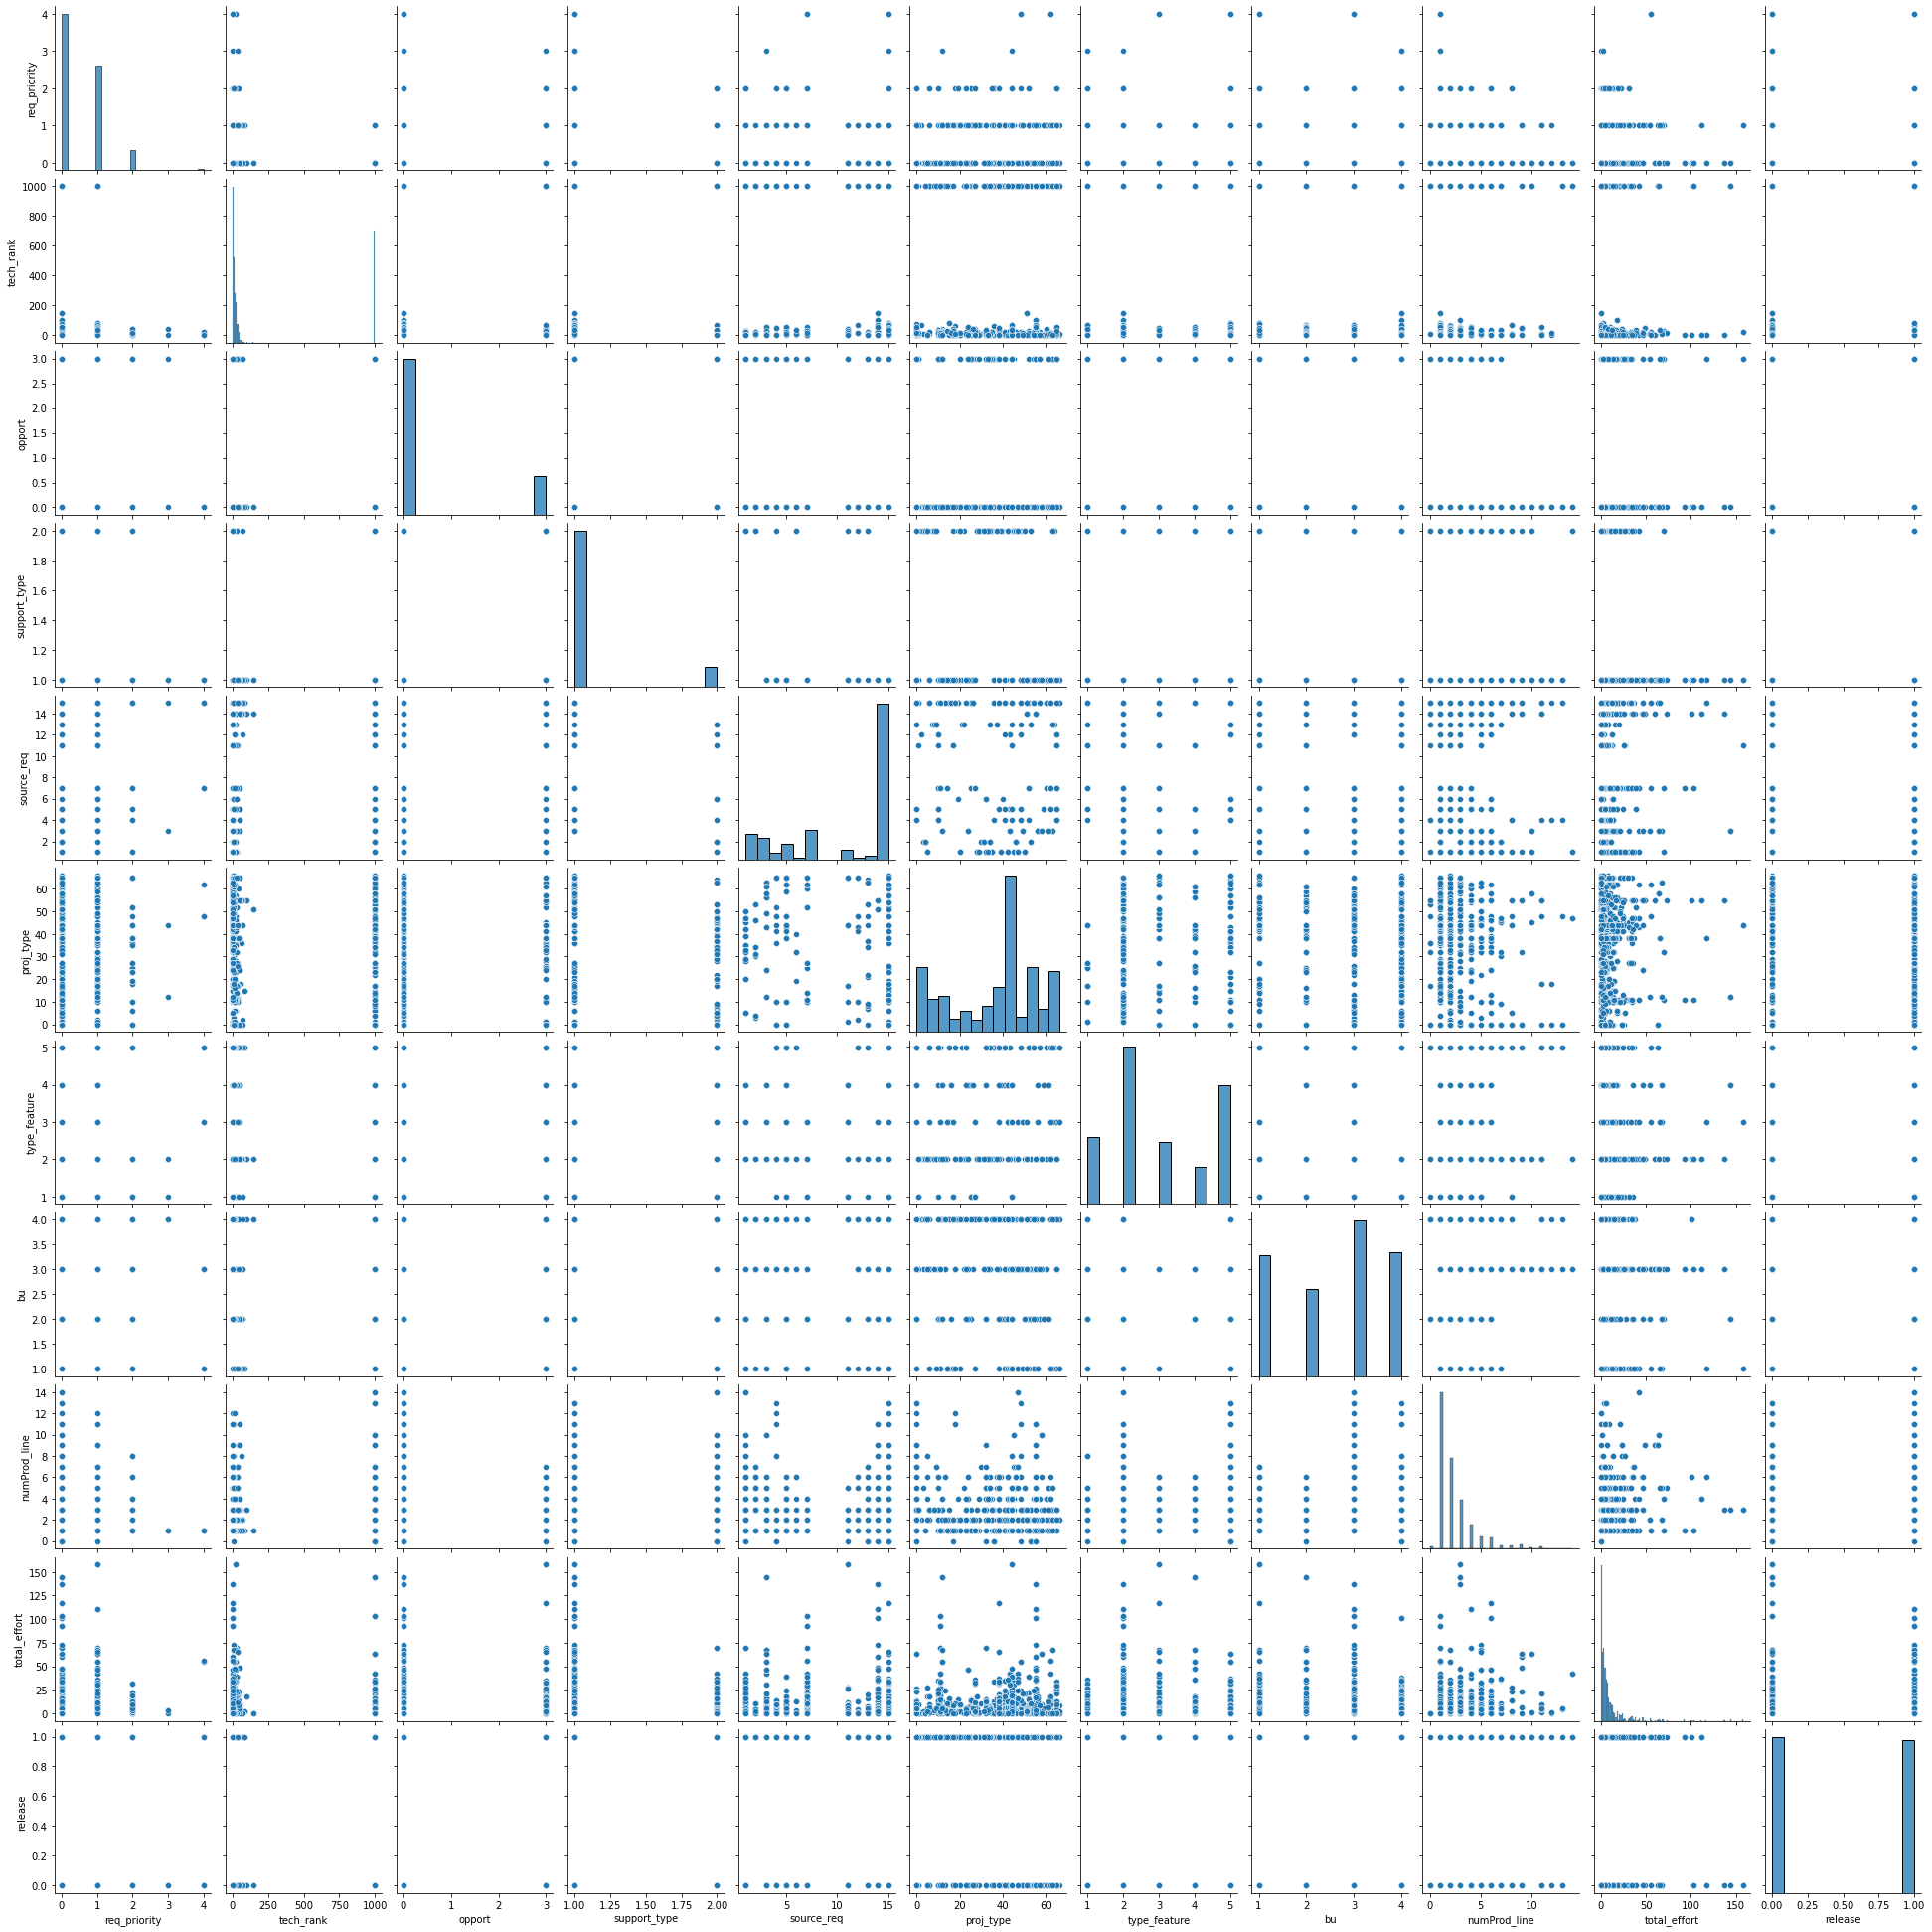

In [53]:
#from pd.tools.plotting import scatter_matrix
#scatter_matrix(dataset1, figsize=(10,10))
#plt.suptitle("Pair Plot", fontsize=15)
sns.pairplot(dataset1)

In [54]:
best = fmin(
    fn=lambda sig: MiniSom(x=x,
                          y=y,
                          input_len=input_len,
                          sigma=sigma,
             learning_rate = learning_rate).quantization_error(data),
    space=hp.uniform("sig", 0.001, x /2.01),
    algo = tpe.suggest,
    max_evals = 200)
elapsed_time = time.time() - start_time
print (best)
    

100%|██████████| 200/200 [00:01<00:00, 109.53trial/s, best loss: 261.5451081941712]
{'sig': 2.653128497662081}


In [55]:
sigma = best['sig']


In [56]:
som = train_som(x, y, input_len, sigma, learning_rate)

0.06700277328491211  seconds


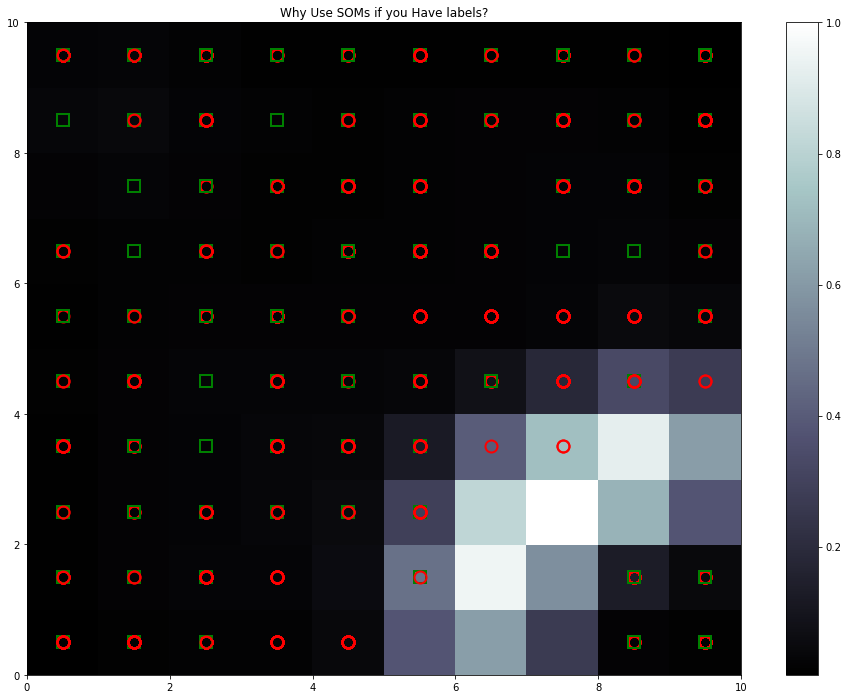

In [57]:
plot_som(som)